Act 2. Fundamentos Big Data

Alumno: Jose Sepulveda

## Actividad 1
**Primera parte de la Actividad de la Lección 2** (hasta 6 puntos)

Para comprobar de alguna manera que el/la alumno ha trabajado el manual, se pedirá que el alumno envíe el archivo .ipynb con la programación paso a paso de todo lo explicado en el manual relacionado con Gráficos rápidos con pandas (punto 3 del manual)

A continuación en el propio .ipynb dejar alguna celda en blanco

Y continúa con la Segunda parte de la actividad en el mismo archivo

In [1]:
# se importa paquete necesarios para esta actividad
import pandas as pd
import matplotlib.pyplot as plt

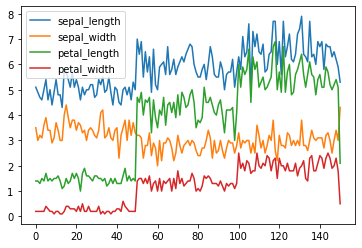

In [2]:
# se genera datos para generar graficos
# df = pd.DataFrame({"X": [10, 20, 30, 40, 50], "y": [15, 5, 10, 8, 6]})
df = pd.read_csv("iris.csv", )

# plot de lineas 
df.plot()
plt.show()

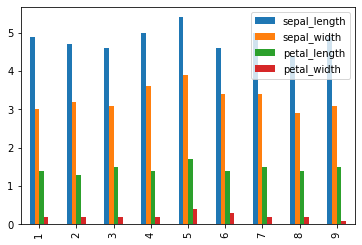

In [3]:
# grafico de barras
df[1:10].plot(kind="bar")
plt.show()

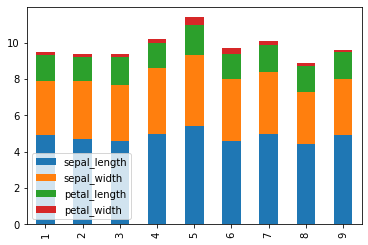

In [4]:
# grafico de barras apiladas
df[1:10].plot(kind="bar", stacked=True)
plt.show()

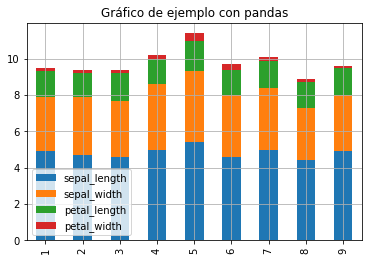

In [5]:
# grafico de barras apiladas, con grid activo y titulo
df[1:10].plot(kind="bar", stacked=True, grid=True, title="Gráfico de ejemplo con pandas")
plt.show()

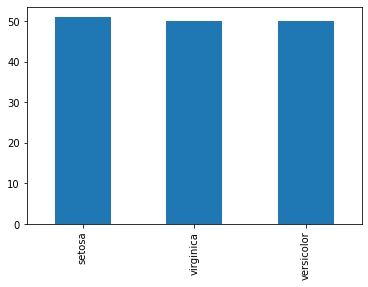

In [6]:
# se crea bar plot de la variable y
df.species.value_counts().plot(kind="bar")
plt.show()

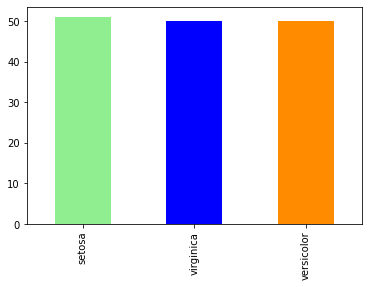

In [7]:
# se crea bar plot de la variable y asignando color a las barras
df.species.value_counts().plot(kind="bar", color=["lightgreen", "blue", "darkorange"])
plt.show()

## Actividad 2
**Segunda parte de la Actividad de la Lección 2** (hasta 2 puntos)

Ggplot es una librería muy importante en “R” (lenguaje de programación).

En el caso de Python, lo que se va a pedir es que se aprenda de forma autodidacta a hacer las gráficas para Iris Dataset con “plotnine”.

Los colores no necesitan coincidir, pero la gráfica debería ser la misma.
(pétalo y/o sépalo)

Si fueras capaz de aprender algo de esta librería, pero, tal y como se ha comentado, no has sido capaz de hacer esas gráficas podrías perfectamente comentar en una celda de Jupyter qué has aprendido de forma autodidacta, y puedes añadir esas líneas de código, gráficas, para que se vea el esfuerzo y el aprendizaje realizado.

A continuación en el propio .ipynb dejar alguna celda en blanco

Y continúa con la Tercera parte de la actividad en el mismo archivo.

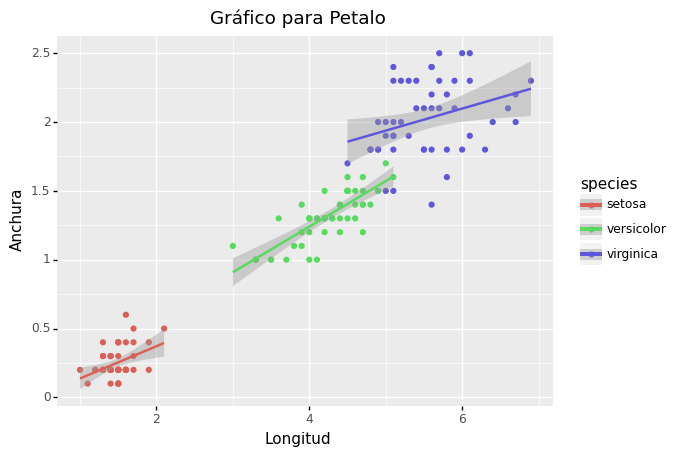

<ggplot: (28781316)>

In [8]:
from plotnine import *

(
    ggplot(df, aes(x='petal_length', y='petal_width', color='species'))
    + geom_point()
    + geom_smooth(method='lm')
    + labs(x='Longitud', y='Anchura', title="Gráfico para Petalo")
)

## Actividad 3
**Tercera parte de la Actividad de la Lección 2** (hasta 2 puntos)

Tableau es una herramienta mencionada en los apuntes.

¿ Existe alguna forma de programar, o de integrar Python con Tableau ?

Copia y pega este enunciado en una celda, teniendo en cuenta que no es código, sino texto.

Si no hay librería alguna que de alguna forma me relacione Tableau con Python como decimos de la forma que sea, indica este propio enunciado (en una celda) y como respuesta (en la celda siguiente): comenta brevemente tu comentario: “no hay nada de Python relacionado con Tableau”.

Si es que sí, indicar el nombre de la herramienta, y una breve explicación.

Puedes añadir incluso un ejemplo.

**Respuesta**: existe una extension de tableu que, al instarla en Tableu, permite ejecutar codigo python dentro de Tableu. Esta herramienta se llama ***TabPy***

Para hacer uso de este modulo primero se necesita instalar el paquete usando el comando *pip install tabpy*. Una vez instalado podemos ejecutar codigo python desde Tableu: 
<ol>
    <li>Escriendo codigo Python directamente en el campo calculado dentro de Tableu</li>
    <li>Creando una función Python y utilizandola en el server de Tappy como una REST API</li>
</ol>


## Actividad 4
**Cuarta parte de la Actividad de la Lección 2** (hasta 2 puntos)

Se han mencionado más cosas.

Se pedirá en este caso que se tome uno de ellos, y se trate de aprender de forma autodidacta, se pedirá que en el mismo archivo .ipynb se presente algo relacionado con Bokeh preferentemente, o de Power BI.

No es importante la elección, pudiera ser Folium, Savvy, o incluso alguna cosa no vista.

Pista: No tiene por qué ser algo complejo. Podría ser algo relacionado, similar a la información que te encontrarás en sus respectivos sitios web.

**Respuesta**: para esta ultima actividad se va a utilizar bokeh

In [9]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure

output_notebook()

# creamos dataframe para el boxplot
df_2 = df[['sepal_width', 'species']]
cats = df_2.species.unique()

# se calculan los cuantiles para cada una de las species
groups = df_2.groupby('species')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# se buscan outliers para cada una de las species
def outliers(group):
    cat = group.name
    return group[(group.sepal_width > upper.loc[cat]['sepal_width']) | 
                 (group.sepal_width < lower.loc[cat]['sepal_width'])]['sepal_width']
out = groups.apply(outliers).dropna()

# si exiten otuliers se condicionan para el plot
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)

# para especificar la logitud de los bigotes si no hay ouliers
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.sepal_width = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'sepal_width']),upper.sepal_width)]
lower.sepal_width = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'sepal_width']),lower.sepal_width)]

# bigotes
p.segment(cats, upper.sepal_width, cats, q3.sepal_width, line_color="black")
p.segment(cats, lower.sepal_width, cats, q1.sepal_width, line_color="black")

# cajas
p.vbar(cats, 0.7, q2.sepal_width, q3.sepal_width, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.sepal_width, q2.sepal_width, fill_color="#3B8686", line_color="black")

# bigotes
p.rect(cats, lower.sepal_width, 0.2, 0.01, line_color="black")
p.rect(cats, upper.sepal_width, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"
p.xaxis.axis_label="Species"
p.yaxis.axis_label="Anchura de Sepalo"

show(p, notebook_handle=True)

Loading BokehJS ...